#Soal 6

Nenek Tasya merupakan seorang lansia yang hidup sendirian. Di kehidupan sehari hari, jika ingin bepergian, Nenek Tasya selalu menggunakan taksi. Sayangnya, sering kali uang nenek tidak cukup untuk membayar tarif taksi. Oleh karena itu, nenek meminta tolong kepada kamu yang merupakan mahasiswa sains data untuk membuat model yang dapat mengestimasi harga taksi yang akan digunakan nenek.

Dengan dataset taxi_pricing.csv yang berisi record perjalanan beserta tarifnya:
* Buatlah model untuk memprediksi harga taksi menggunakan multiple linear regression
* Tuliskan persamaan matematis akhir dari model yang telah  dibuat
* Hitunglah dua metrik evaluasi untuk mengukur performa model (Rsquare dan RMSE).
* Lakukan analisis yang mendalam mengenai bentuk model yang telah dibuat, beserta analisis metrik evaluasinya

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = "/content/drive/MyDrive/uts_pds/taxi_trip_pricing.csv"

In [4]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv(data)

In [9]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [13]:
data = data.drop(columns=['Time_of_Day', 'Day_of_Week','Traffic_Conditions','Weather'])

In [14]:
data.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624
1,47.59,1.0,NaN,0.62,0.43,40.57,NaN
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032
3,30.33,4.0,3.48,0.51,0.15,116.81,36.4698
4,NaN,3.0,2.93,0.63,0.32,22.64,15.6180


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Passenger_Count        950 non-null    float64
 2   Base_Fare              950 non-null    float64
 3   Per_Km_Rate            950 non-null    float64
 4   Per_Minute_Rate        950 non-null    float64
 5   Trip_Duration_Minutes  950 non-null    float64
 6   Trip_Price             951 non-null    float64
dtypes: float64(7)
memory usage: 54.8 KB


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 998
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       700 non-null    float64
 1   Passenger_Count        700 non-null    float64
 2   Base_Fare              700 non-null    float64
 3   Per_Km_Rate            700 non-null    float64
 4   Per_Minute_Rate        700 non-null    float64
 5   Trip_Duration_Minutes  700 non-null    float64
 6   Trip_Price             700 non-null    float64
dtypes: float64(7)
memory usage: 43.8 KB


In [23]:
import statsmodels.api as sm
X = data.drop(columns=['Trip_Price'])
y = data['Trip_Price']

X = sm.add_constant(X)

# membuat model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Trip_Price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     903.9
Date:                Sun, 26 Oct 2025   Prob (F-statistic):          9.88e-324
Time:                        07:08:36   Log-Likelihood:                -2842.6
No. Observations:                 700   AIC:                             5699.
Df Residuals:                     693   BIC:                             5731.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -58.53

Y = -58.5364 + 1.7599Trip_Distance_km -0.2101Passenger_Count+0.6045Base_Fare + 24.6430Per_Km_Rate + 60.2345Per_Minute_Rate + 0.2945Trip_Duration_Minutes

R square = 0.887 -> variabel2 independen dapat menjelaskan 88,7% variansi dari tip taksi, 13% lainnya dijelaskan oleh variabel lain


# Soal 7
* Lakukan simulasi yang memodelkan perubahan ketinggian pada tangki
dengan 1 keran inlet dan 1 keran outlet, di mana simulasi dilakukan selama 10 detik. kran inlet di buka 5% pada detik ke 3 hingga detik ke 8, dan kran outlet terbuka 20% pada detik ke 3 sampai detik ke 5. Diketahui luas permukaan tangki 2 m^2, massa jenis air 1000 kg/m^3, dan konstanta aliran air 50 kgm/s^2 (buat fungsi nya, selesaikan dengan odeint, lalu visualisasikan hasil simulasi)

* Lakukan analisis mengenai keadaan air di dalam tangki selama proses simulasi

Rumus :
$$
\frac{dh}{dt} = \frac{c(u_i - u_o)}{\rho A}
$$

\
\begin{aligned}
h & : \text{tinggi permukaan air dalam tangki (m)} \\
t & : \text{waktu (s)} \\
c & : \text{konstanta aliran air (kg·m/s²)} \\
u_i & : \text{besar bukaan kran inlet} \\
u_o & : \text{besar bukaan kran outlet} \\
\rho & : \text{massa jenis air (kg/m³)} \\
A & : \text{luas alas tangki (m²)}
\end{aligned}

In [28]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [26]:
# memuat model sistem dinamis di dalam function bernama tank
''''
Fungsi ini berisi rumus sistem dinamis tangki. terdapat 5 parameter/input dalam fungsi ini, yaitu:
- h : ketinggian air saat ini (meter)
- time : waktu yang ingin disimulasikan (sekon)
- c : konstanta aliran air
- inlet : besar bukaan kran inlet
- outlet : besar bukaan kran outlet

di fungsi ini, terdapat 2 konstanta yaitu rho (massa jenis air = 1000 kg/m^3)
dan A (luas alas tangki = 1 m^2)
'''
def tank(h, time, c, inlet, outlet):
  rho = 1000.0
  A = 2.0
  dh_dt = c*(inlet-outlet)/(rho * A)
  return dh_dt

In [34]:
ts= np.linspace(0,10,101)
# membuat variabel yg memuat kondisi kran inlet dan outlet sepanjang waktu
''''
menggunakan fungsi zeros() dari numpy

np.zeros(num)
= membuat array berisi angka 0 sebanyak num elemen.

'''
ki = np.zeros(101)
ko = np.zeros(101)

# inisialisasi kondisi kran inlet dan outlet
''''
kran outlet dibuka 20% pada saat 3 ≤ t ≤ 5. Kran inlet dibuka 5% saat 3 ≤ t ≤ 8
'''
ko[40:51] = 20.0
ki[30:81] = 5.0

In [35]:
# initial state
h = 0.0  # kan awalnya tangki kosong
c = 50.0 # konstanta laju air 50
z = np.zeros(101) # membuat variabel z berisi 101 array kosong untuk menyimpan hasil simulasi


# simulasi dgn ODEINT
# odeint(function, variabel_yg_berubah, t, args = )
for i in range(100):
    inlet = ki[i + 1]
    outlet = ko[i + 1]
    y = odeint(tank, h, [0, 0.1], args=(c, inlet, outlet))
    h = max(y[-1][0], 0) #menyimpan hasil ketinggian air tangki dalam 1
    z[i + 1] = h


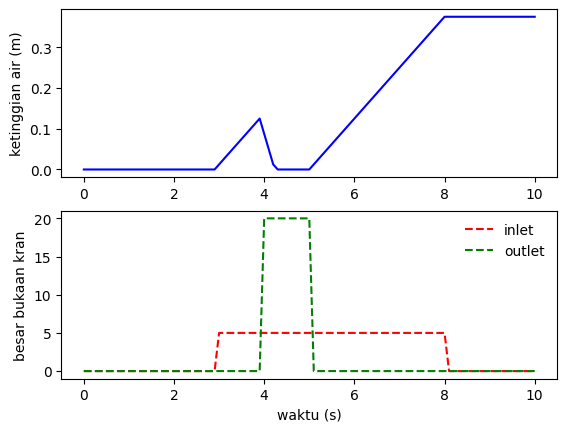

In [36]:
# plot results

#kanvas
plt.figure()

# membuat subplot
# plt.subplot (baris, kolom, indeks)  *klo di matplotlib indeks nya dari 1

# 1. subplot berisi kondisi ketinggian air sepanjang waktu (x= time_span, y=z)
plt.subplot(2,1,1)
plt.plot(ts,z, 'b')
plt.ylabel("ketinggian air (m)")

# 2. subplot berisi kondisi bukaan kran sepanjang waktu (x= time_span, y = ki dan ko)
plt.subplot(2,1, 2)
plt.plot(ts, ki, 'r--', label='inlet' ) #ki
plt.plot(ts, ko, 'g--', label='outlet') #ko
plt.ylabel('besar bukaan kran')
plt.xlabel('waktu (s)')

plt.legend(frameon=False)

plt.show()

# Soal 8

Sebuah sensor otomatis di Waduk Cengklik mencatat ketinggian permukaan air (dalam meter) pada jam-jam tertentu dalam satu hari. Namun, karena ada gangguan sinyal, sensor gagal mengirimkan data pada jam 10:00.

Bantu pihak waduk untuk mengestimasi ketinggian air pada jam 10:00 tersebut menggunakan data yang berhasil terekam.

Estimasi ketinggian air pada jam 10:00 adalah: 105.69 meter


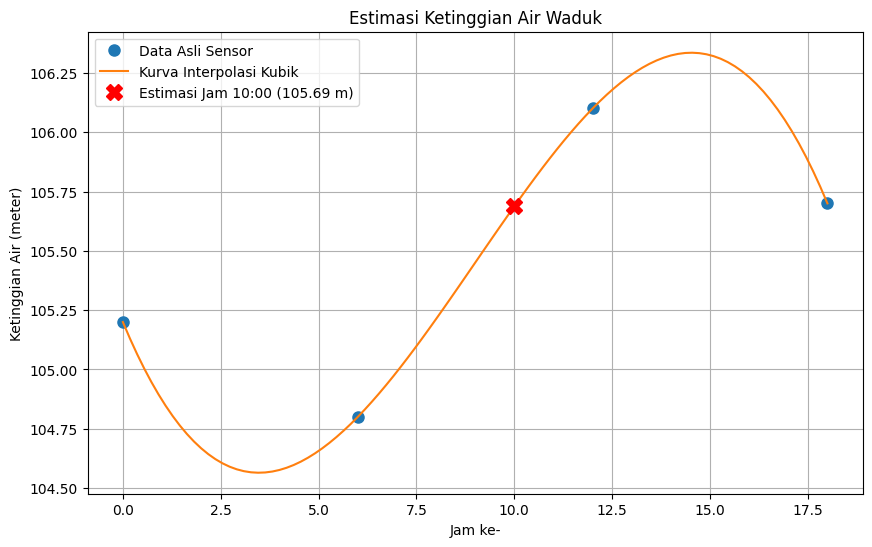

In [37]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

#
x_known = np.array([0, 6, 12, 18])
y_known = np.array([105.2, 104.8, 106.1, 105.7])
jam_estimasi = 10

# 3. Buat fungsi
f_cubic = CubicSpline(x_known, y_known)

# 4. Lakukan estimasi pada jam_estimasi
estimasi_ketinggian = f_cubic(jam_estimasi)

print(f"Estimasi ketinggian air pada jam {jam_estimasi}:00 adalah: {estimasi_ketinggian:.2f} meter")

# 5. Visualisasi Hasil
x_new = np.linspace(0, 18, 100)
y_new = f_cubic(x_new)

plt.figure(figsize=(10, 6))
plt.plot(x_known, y_known, 'o', markersize=8, label='Data Asli Sensor')
plt.plot(x_new, y_new, '-', label='Kurva Interpolasi Kubik')

plt.plot(jam_estimasi, estimasi_ketinggian, 'X', color='red', markersize=12, label=f'Estimasi Jam 10:00 ({estimasi_ketinggian:.2f} m)')
plt.title('Estimasi Ketinggian Air Waduk')
plt.xlabel('Jam ke-')
plt.ylabel('Ketinggian Air (meter)')
plt.legend()
plt.grid(True)
plt.show()

# Soal 9
Sebuah pabrik memproduksi baut dalam jumlah besar. Diketahui bahwa probabilitas satu baut mengalami cacat produksi (misalnya, ulir tidak sempurna) adalah 0.08%. Pabrik tersebut mengemas baut dalam kotak-kotak besar berisi 400 baut.Misalkan $X$ adalah jumlah baut yang cacat dalam satu kotak.
* Bagaimana distribusi Probability Mass Function (PMF) untuk $X$?
* Berapakah peluang bahwa dalam satu kotak yang dipilih acak, terdapat tepat 4 baut yang cacat?

Hitung dengan pendekatan distribusi probabilitas Poisson untuk menyelesaikan kasus ini

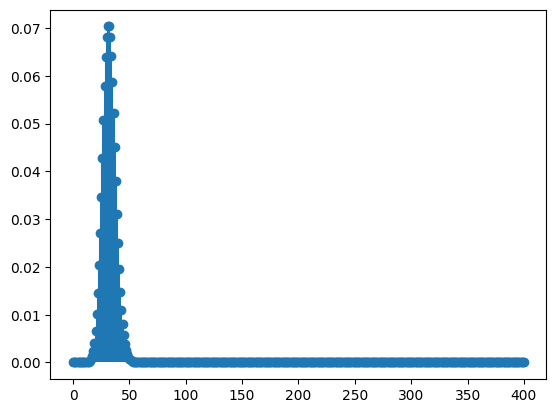

In [39]:
# visualisasi PMF dari distribusi possion
from scipy import stats
x = np.arange(0, 401) # bikin sumbu x sebanyak dari 1-100
mu = 0.08*400
pmf = stats.poisson.pmf(x, mu) #menghitung PMF nya. syntax = stats.poisson.pmf(x,mu) mu itu lambda
plt.stem(x, pmf,  basefmt=' ')
plt.show()

In [45]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

# Peluang terdapat 4 baut yang cacat
n = 400  # jumlah baut
p = 0.08

pmf = stats.poisson.pmf(k=4, mu=mu)
print(pmf)


5.533058356169565e-10
